In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

## Data Load

In [2]:
# open dataset
df_pontuation = pd.read_csv('./datasets/pontuation.csv')

## EDA

In [3]:
# Statistics analysis of the variables
df_pontuation.describe()

,study_hours,pontuation
count,70.000000,70.000000
mean,42.142857,237.442857
std,29.002392,207.311335
min,1.000000,1.000000
25%,18.250000,91.250000
50%,35.500000,177.500000
75%,65.500000,327.500000
max,100.000000,912.000000


<Axes: xlabel='study_hours', ylabel='pontuation'>

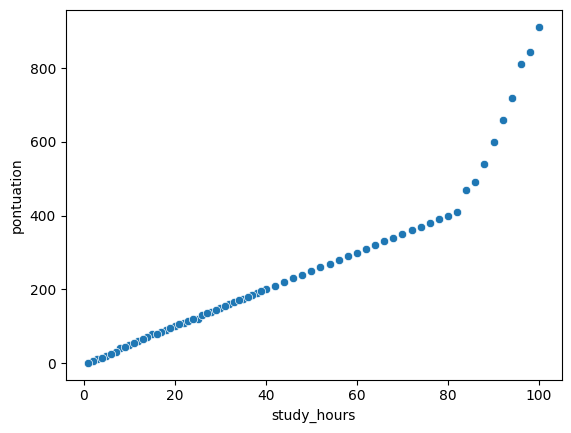

In [4]:
# dispersion plt
# X = study_hours
# y = pontuation
sns.scatterplot(data=df_pontuation, x='study_hours', y='pontuation')

<Axes: ylabel='study_hours'>

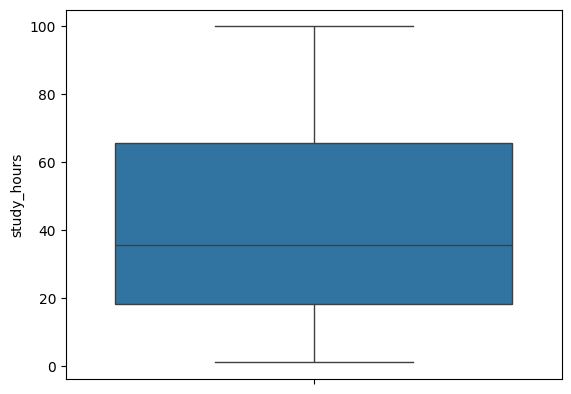

In [5]:
# verify outliers in independent variable
sns.boxplot(df_pontuation, y='study_hours')

<Axes: ylabel='pontuation'>

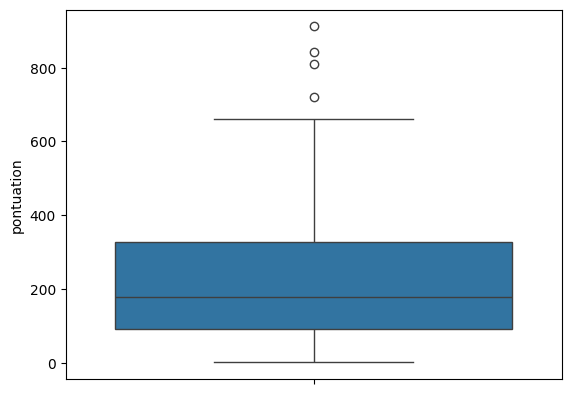

In [6]:
# verify outliers in dependent variable
sns.boxplot(df_pontuation, y='pontuation')

<Axes: >

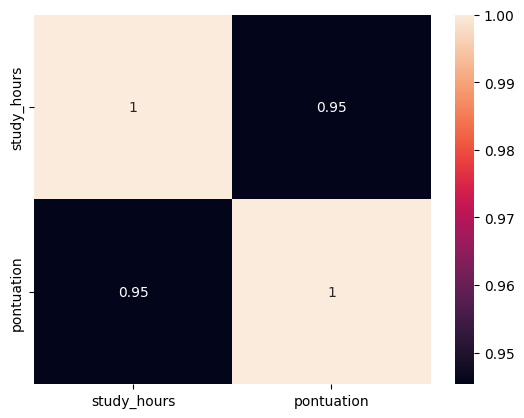

In [7]:
# Verify correlation - Pearson
sns.heatmap(df_pontuation.corr('pearson'), annot=True)

<Axes: >

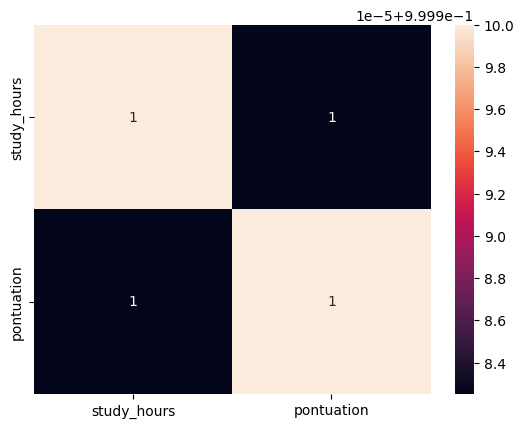

In [8]:
# Verify correlation - Spearman (non-linear)
sns.heatmap(df_pontuation.corr('spearman'), annot=True)

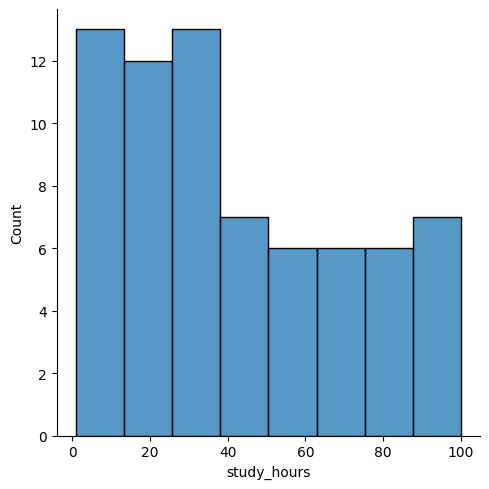

In [9]:
# Histogram of variables
sns.displot(df_pontuation, x='study_hours')

## Train model

In [10]:
# Divide training and test
# when there is just one feature, it is necessary to reshape the array
X = df_pontuation.study_hours.values.reshape(-1, 1)
y = df_pontuation.pontuation.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [11]:
# Instantiate the model to be trained
reg_model = LinearRegression()

In [12]:
# Train the model
reg_model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Print the equation of the model
# y = ax + b
print("The equation of y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

The equation of y = 6.136649x + -30.105966


## Validate Model - Metrics

In [14]:
# Predict values based on tests dataset
y_pred = reg_model.predict(X_test)

In [15]:
# Calculate metric R-squared or Determination Coefficient
# 0 to 1. Represents the percentage of the dependent variable that is explained by the independent variable
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test, y_pred)

0.8474729137373836

In [16]:
# Simple Regression tries to minimize the sum of the squared errors
# Calculate metric Mean Absolute Error (MAE) - difference between the real value and the predicted value
# MAE = Media(y_test - y_pred)
mean_absolute_error(y_test, y_pred)

52.03933128818715

In [17]:
# Calculate metric Mean Squared Error (MSE) - difference between the real value and the predicted value
# MSE = Media(y_test - y_pred)^2
mean_squared_error(y_test, y_pred)

9613.965556329353

In [19]:
# Calculate metric Root Mean Squared Error (RMSE) - difference between the real value and the predicted value
# MSE = Raiz(Media(y_test - y_pred)^2)
mean_squared_error(y_test, y_pred, squared=False)

98.05083149228952

In [ ]:
# Graphical analysis of the model
x_axis = range(len(y_test))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='b', label='Real Values')